# Devoir Final Forage de Données

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [2]:
winedf = pd.read_csv('winemag-data_first150k.csv')
winedf

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [3]:
# Show duplicated value from the description field
winedf[winedf['description'].duplicated(keep = False)].sort_values('description')

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
147725,147725,Chile,$11. Opens with a highly perfumed bouquet of l...,Estate Reserve,84,11.0,Maipo Valley,NaN,NaN,Chardonnay,La Playa
62345,62345,Chile,$11. Opens with a highly perfumed bouquet of l...,Estate Reserve,84,11.0,Maipo Valley,NaN,NaN,Chardonnay,La Playa
74993,74993,US,). Very good wine from a winery increasingly k...,Rockpile Ridge Vineyard,92,47.0,California,Rockpile,Sonoma,Cabernet Sauvignon,Mauritson
18803,18803,US,). Very good wine from a winery increasingly k...,Rockpile Ridge Vineyard,92,47.0,California,Rockpile,Sonoma,Cabernet Sauvignon,Mauritson
26530,26530,Austria,". Christoph Neumeister's top wine, this is a c...",Moarfeitl,93,48.0,Südoststeiermark,NaN,NaN,Sauvignon Blanc,Neumeister
84730,84730,Austria,". Christoph Neumeister's top wine, this is a c...",Moarfeitl,93,48.0,Südoststeiermark,NaN,NaN,Sauvignon Blanc,Neumeister
53110,53110,Austria,". Christoph Neumeister's top wine, this is a c...",Moarfeitl,93,48.0,Südoststeiermark,NaN,NaN,Sauvignon Blanc,Neumeister
107351,107351,France,. From a small south-facing parcel next to the...,Trie Spéciale,91,38.0,Loire Valley,Savennières,NaN,Chenin Blanc,Domaine des Baumard
65231,65231,France,. From a small south-facing parcel next to the...,Trie Spéciale,91,38.0,Loire Valley,Savennières,NaN,Chenin Blanc,Domaine des Baumard
43074,43074,Germany,. Lemon zest and exotic spices enliven the nos...,Bernkasteler Badstube Kabinett,86,22.0,Mosel,NaN,NaN,Riesling,Dr. Pauly Bergweiler


In [4]:
winedf = winedf.drop_duplicates('description')

In [5]:
len(winedf)

97821

In [6]:
len(winedf['variety'].unique())

632

On réduit le nombre de données en prennant uniquement les données ayant une variété présente plus de 2000 fois dans le tableau afin de limiter le nombre de cluster par la suite

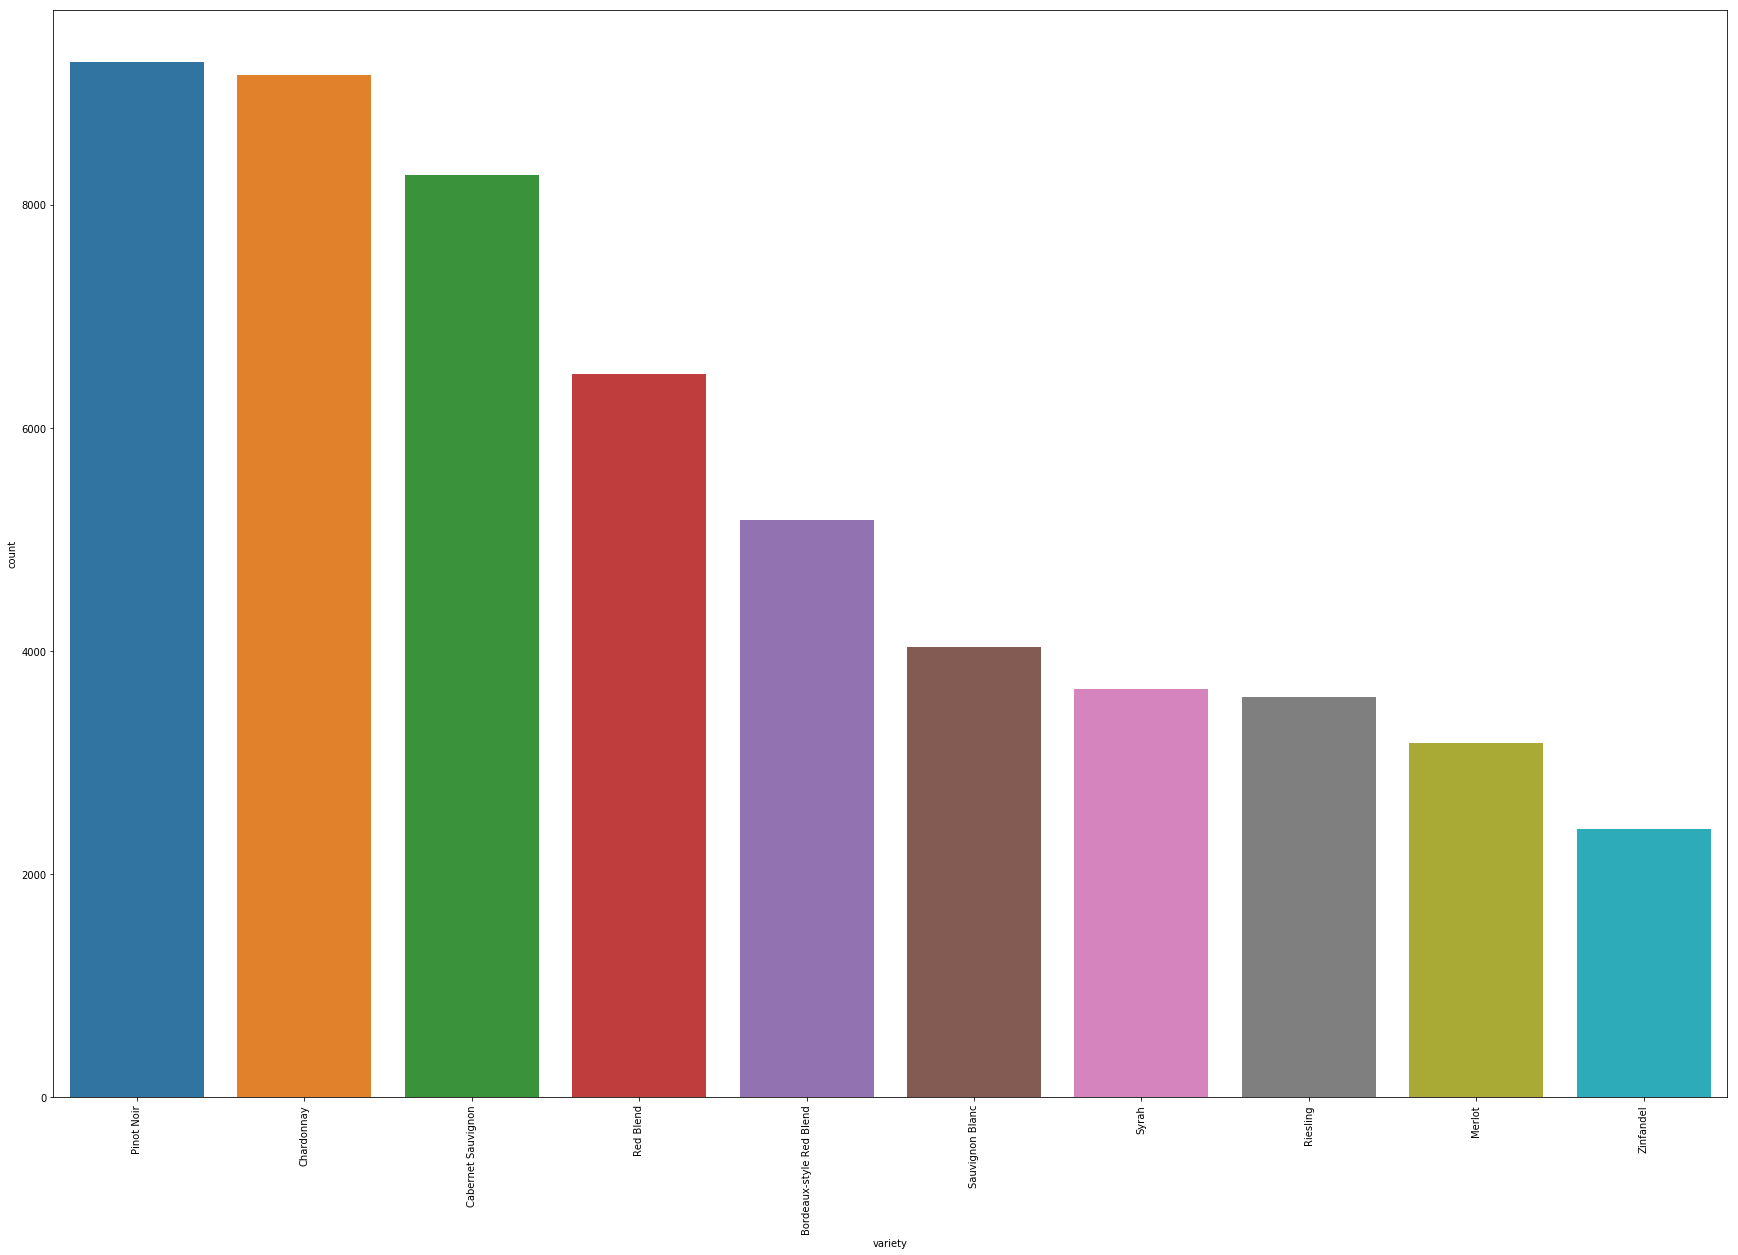

In [7]:
variety_df = winedf.groupby('variety').filter(lambda x: len(x) > 2200)
varieties = variety_df['variety'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (30, 20))
sns.countplot(x = variety_df['variety'], order = varieties, ax = ax)
plt.xticks(rotation = 90)
plt.show()

In [8]:
len(variety_df)

55226

In [9]:
len(variety_df['variety'].unique())

10

In [10]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [11]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
unrelavent_words = ['wine', 'flavor']
wines_varieties = variety_df['variety'].unique()
wines_varieties = ','.join(wines_varieties).lower().split(',')
stop_words = text.ENGLISH_STOP_WORDS.union(punc, unrelavent_words, wines_varieties)
desc = variety_df['description'].values

In [12]:
stop_words

frozenset({'!',
           '"',
           '%',
           "'",
           '(',
           ')',
           ',',
           '.',
           ':',
           ';',
           '?',
           '[',
           ']',
           'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
    

In [13]:
vectorizer = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X = vectorizer.fit_transform(desc)
words = vectorizer.get_feature_names()

/usr/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'blanc', 'blend', 'bordeaux', 'cabernet', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noir', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pinot', 'pleas', 'red', 'riesl', 'sauvignon', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'style', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_wor

In [125]:
vectorizer.vocabulary_

{'tremend': 922,
 'variet': 942,
 'age': 12,
 'year': 989,
 'oak': 584,
 'juici': 452,
 'red': 709,
 'cherri': 154,
 'fruit': 360,
 'compel': 190,
 'hint': 418,
 'caramel': 133,
 'palat': 609,
 'frame': 355,
 'eleg': 281,
 'fine': 334,
 'tannin': 890,
 'subtl': 866,
 'minti': 546,
 'tone': 917,
 'background': 50,
 'balanc': 54,
 'reward': 728,
 'start': 842,
 'finish': 336,
 'develop': 245,
 'nuanc': 580,
 'enjoy': 287,
 'onc': 593,
 'delici': 236,
 'complex': 193,
 'white': 975,
 'dark': 225,
 'color': 186,
 'layer': 469,
 'toast': 912,
 'pear': 619,
 'orang': 597,
 'peel': 620,
 'succul': 869,
 'l': 460,
 'residu': 721,
 'sugar': 870,
 'month': 554,
 'new': 571,
 'french': 357,
 'vineyard': 953,
 'aromat': 39,
 'dens': 239,
 'toasti': 913,
 'blend': 86,
 'aroma': 38,
 'cigar': 164,
 'box': 98,
 'blackberri': 83,
 'black': 82,
 'coffe': 183,
 'graphit': 384,
 'polish': 656,
 'load': 501,
 'chocol': 159,
 'espresso': 294,
 'drink': 262,
 'bottl': 96,
 "you'll": 993,
 'strike': 857,
 'm

In [129]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

 

pca = PCA(n_components=2).fit(X.todense())
data2D = pca.transform(X.todense())
plt.scatter(data2D[:,0], data2D[:,1], c=data.target)
plt.show()     

NameError: name 'data' is not defined

## Expectation maximization

### 10 clusters

In [15]:
%%time
em10 = GaussianMixture(n_components = 10, max_iter=300, n_init=5, covariance_type = 'spherical')
em10.fit(X.toarray())

CPU times: user 2min 47s, sys: 42.5 s, total: 3min 29s
Wall time: 1min 43s


In [16]:
clusters = em10.predict(X.toarray())

In [24]:
np.shape(X.toarray())

(55226, 1000)

In [17]:
common_words = em10.means_.argsort()

In [18]:
for num, centroid in enumerate(common_words[:,-1:-16:-1]):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : pineappl, butter, toast, vanilla, oak, acid, pear, peach, rich, chard, sweet, fruit, tropic, creami, ripe
1 : blackberri, currant, dri, tannin, cherri, rich, black, oak, drink, tannic, year, cabernet, good, ripe, cab
2 : sweet, cherri, soft, tast, simpl, like, raspberri, blackberri, candi, alcohol, drink, jammi, chocol, littl, jam
3 : appl, citrus, finish, acid, lime, lemon, crisp, miner, fresh, palat, green, peach, fruit, dri, riesl
4 : pinot, noir, cherri, cola, silki, raspberri, dri, acid, drink, spice, oak, year, eleg, complex, rich
5 : cabernet, sauvignon, blend, franc, petit, verdot, black, cherri, fruit, tannin, spice, malbec, sangioves, aroma, blackberri
6 : sampl, barrel, tannin, fruit, ripe, wood, structur, juici, veri, firm, dark, solid, dens, power, acid
7 : fruit, age, wood, tannin, structur, ripe, acid, rich, year, firm, charact, drink, black, fresh, juici
8 : fruit, cherri, finish, tannin, vineyard, oak, light, acid, red, berri, note, spice, blend, ripe, dri
9 : arom

In [19]:
variety_df["cluster"] = clusters

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
variety_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,cluster
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,8
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,8
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,8
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,8
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,8
11,11,US,"From 18-year-old vines, this supple well-balan...",Estate Vineyard Wadensvil Block,95,48.0,Oregon,Ribbon Ridge,Willamette Valley,Pinot Noir,Patricia Green Cellars,8
12,12,US,A standout even in this terrific lineup of 201...,Weber Vineyard,95,48.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Patricia Green Cellars,8
14,14,US,"With its sophisticated mix of mineral, acid an...",Grace Vineyard,95,185.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Domaine Serene,8
15,15,US,"First made in 2006, this succulent luscious Ch...",Sigrid,95,90.0,Oregon,Willamette Valley,Willamette Valley,Chardonnay,Bergström,8
16,16,US,"This blockbuster, powerhouse of a wine suggest...",Rainin Vineyard,95,325.0,California,Diamond Mountain District,Napa,Cabernet Sauvignon,Hall,8


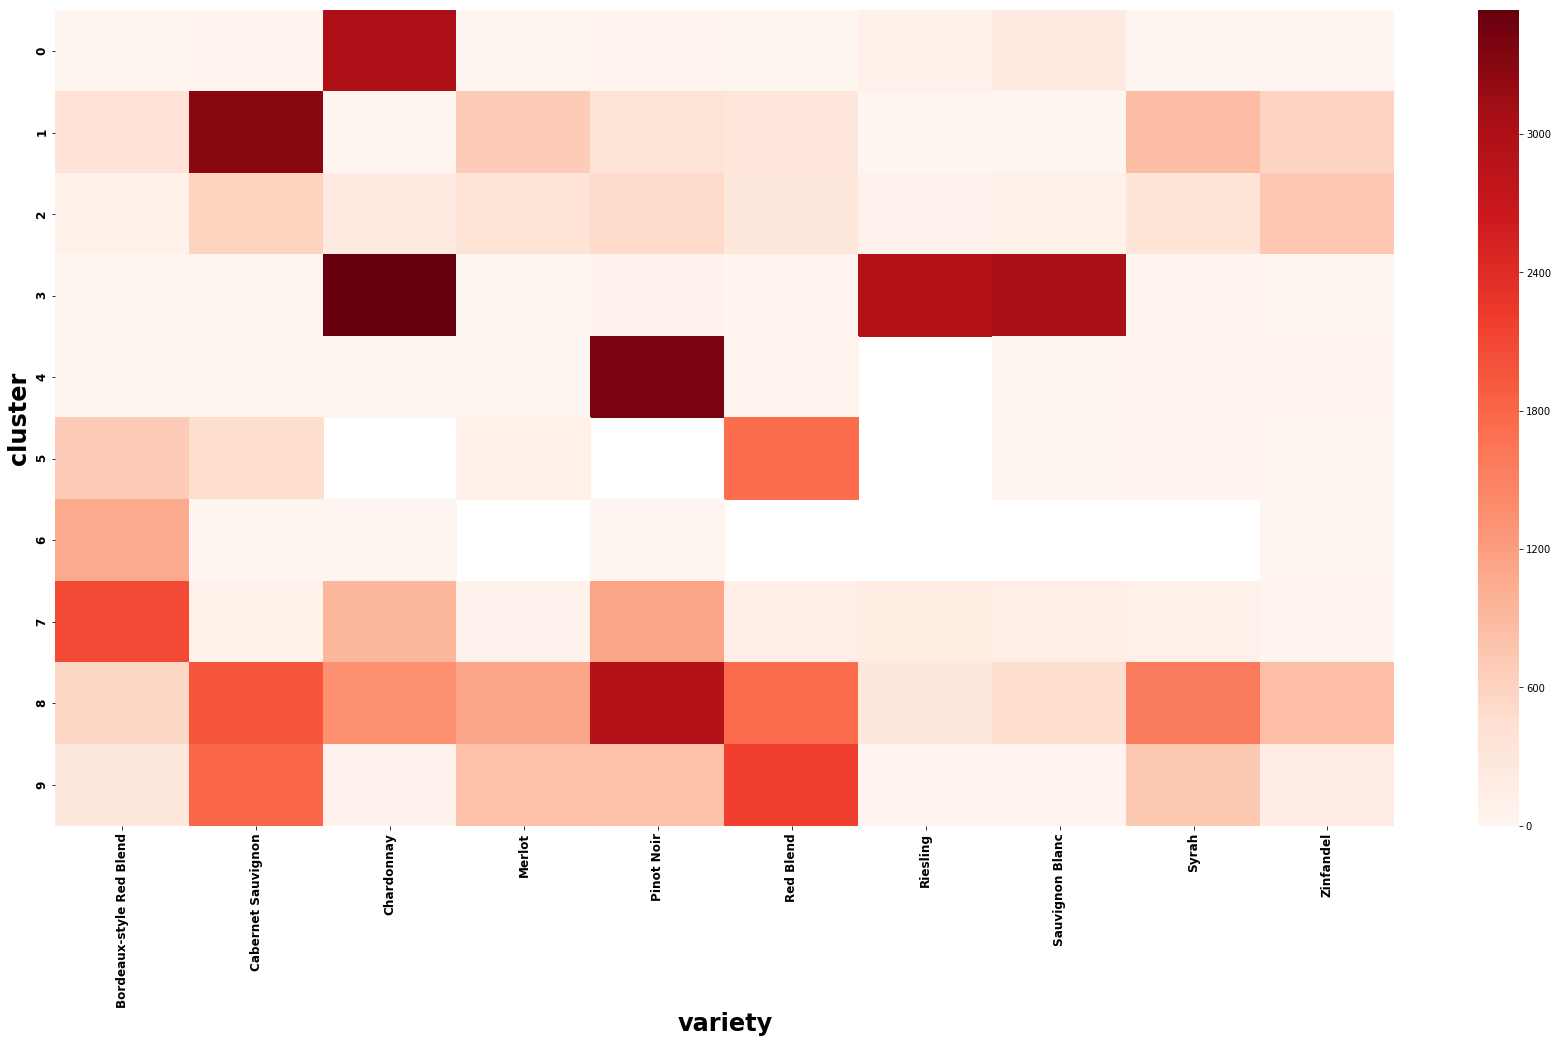

In [21]:
clusters = variety_df.groupby(['cluster', 'variety']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'variety'), ax = ax2, cmap = 'Reds')
plt.xticks(rotation = 90)

ax2.set_xlabel('variety', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(12)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(12)
    label.set_weight("bold")

In [27]:
metrics.davies_bouldin_score(X.toarray(), variety_df["cluster"])

/usr/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


8.02867921359605

In [32]:
r_sil_samp = metrics.silhouette_samples(X.toarray(), variety_df["cluster"], metric='euclidean')

In [33]:
r_sil_score = metrics.silhouette_score(X.toarray(), variety_df["cluster"], metric='euclidean')

In [34]:
r_cal_har = metrics.calinski_harabaz_score(X.toarray(), variety_df["cluster"])

### 9 clusters

In [35]:
%%time
em9 = GaussianMixture(n_components = 9, max_iter=300, n_init=5, covariance_type = 'spherical')
em9.fit(X.toarray())

CPU times: user 2min 40s, sys: 47.8 s, total: 3min 27s
Wall time: 1min 41s


In [36]:
clusters = em9.predict(X.toarray())

In [37]:
common_words = em9.means_.argsort()

In [38]:
for num, centroid in enumerate(common_words[:,-1:-16:-1]):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : pineappl, butter, toast, vanilla, oak, acid, pear, sweet, peach, rich, chard, fruit, tropic, creami, apricot
1 : aroma, palat, black, berri, plum, finish, cherri, red, fruit, nose, spice, note, tannin, dark, pepper
2 : fruit, age, wood, tannin, structur, ripe, acid, rich, year, firm, charact, drink, black, fresh, textur
3 : appl, citrus, finish, acid, lime, lemon, crisp, miner, fresh, palat, green, peach, fruit, dri, note
4 : fruit, cherri, finish, tannin, sweet, oak, acid, raspberri, berri, vineyard, red, tast, like, soft, light
5 : pinot, noir, cherri, cola, silki, raspberri, dri, acid, drink, spice, oak, year, eleg, complex, rich
6 : sampl, barrel, tannin, fruit, ripe, wood, structur, juici, veri, firm, dark, solid, dens, power, acid
7 : cabernet, sauvignon, blend, franc, petit, verdot, black, cherri, fruit, tannin, spice, malbec, sangioves, aroma, blackberri
8 : blackberri, currant, cherri, dri, tannin, rich, drink, oak, soft, black, chocol, sweet, ripe, cabernet, tannic


In [39]:
variety_df["cluster"] = clusters

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
variety_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,cluster
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,4
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,4
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,1
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,4
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,4
11,11,US,"From 18-year-old vines, this supple well-balan...",Estate Vineyard Wadensvil Block,95,48.0,Oregon,Ribbon Ridge,Willamette Valley,Pinot Noir,Patricia Green Cellars,4
12,12,US,A standout even in this terrific lineup of 201...,Weber Vineyard,95,48.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Patricia Green Cellars,4
14,14,US,"With its sophisticated mix of mineral, acid an...",Grace Vineyard,95,185.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Domaine Serene,4
15,15,US,"First made in 2006, this succulent luscious Ch...",Sigrid,95,90.0,Oregon,Willamette Valley,Willamette Valley,Chardonnay,Bergström,4
16,16,US,"This blockbuster, powerhouse of a wine suggest...",Rainin Vineyard,95,325.0,California,Diamond Mountain District,Napa,Cabernet Sauvignon,Hall,1


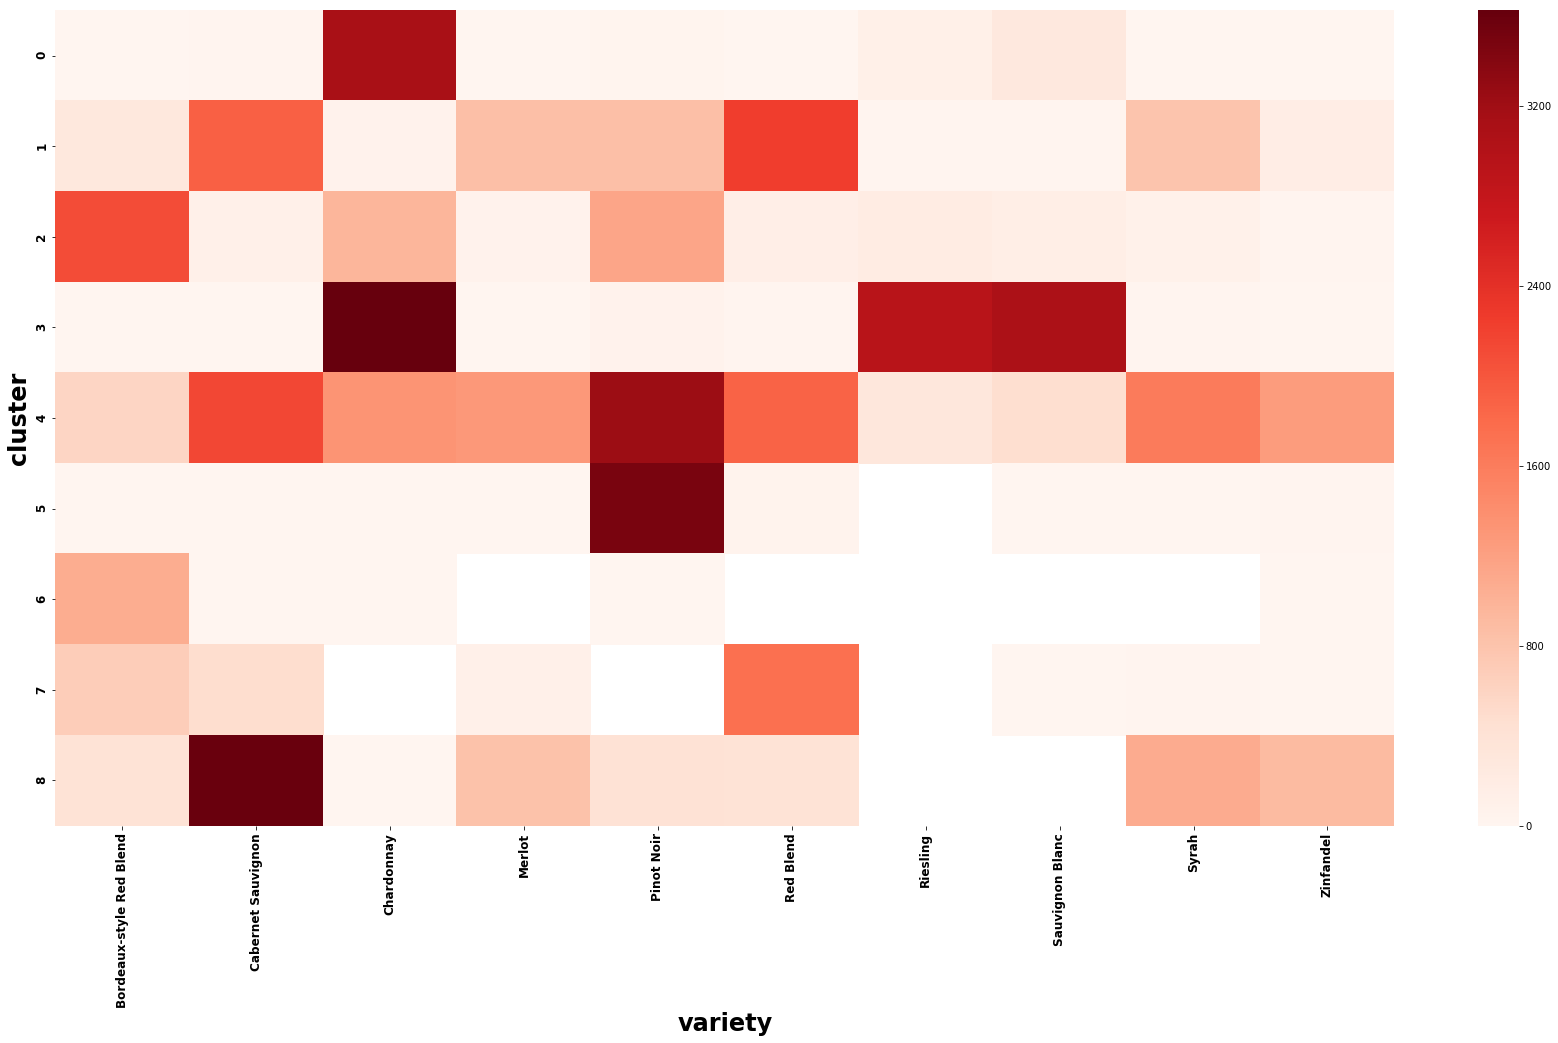

In [41]:
clusters = variety_df.groupby(['cluster', 'variety']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'variety'), ax = ax2, cmap = 'Reds')
plt.xticks(rotation = 90)

ax2.set_xlabel('variety', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(12)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(12)
    label.set_weight("bold")

In [42]:
metrics.davies_bouldin_score(X.toarray(), variety_df["cluster"])

/usr/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


8.107976351019493

In [43]:
r_sil_samp = metrics.silhouette_samples(X.toarray(), variety_df["cluster"], metric='euclidean')

In [44]:
r_sil_score = metrics.silhouette_score(X.toarray(), variety_df["cluster"], metric='euclidean')

In [45]:
r_cal_har = metrics.calinski_harabaz_score(X.toarray(), variety_df["cluster"])

### 8 clusters

In [46]:
%%time
em8 = GaussianMixture(n_components = 8, max_iter=300, n_init=5, covariance_type = 'spherical')
em8.fit(X.toarray())

CPU times: user 2min 18s, sys: 43 s, total: 3min 1s
Wall time: 1min 30s


In [103]:
clusters = em8.predict(X.toarray())

In [48]:
common_words = em8.means_.argsort()

In [49]:
for num, centroid in enumerate(common_words[:,-1:-16:-1]):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : fruit, aroma, finish, cherri, berri, palat, black, red, plum, note, tannin, spice, nose, herbal, dark
1 : fruit, age, wood, tannin, structur, ripe, acid, rich, year, firm, charact, drink, black, fresh, textur
2 : blackberri, cherri, dri, tannin, currant, sweet, soft, drink, rich, oak, ripe, black, chocol, tannic, good
3 : pinot, noir, cherri, cola, silki, raspberri, dri, acid, drink, spice, oak, year, eleg, complex, rich
4 : cabernet, sauvignon, blend, franc, petit, verdot, black, cherri, fruit, tannin, spice, malbec, aroma, sangioves, blackberri
5 : sampl, barrel, tannin, fruit, ripe, wood, structur, juici, veri, firm, dark, solid, dens, power, acid
6 : pineappl, butter, oak, vanilla, toast, acid, sweet, peach, pear, chard, rich, fruit, tropic, creami, apricot
7 : appl, citrus, finish, acid, lemon, lime, crisp, miner, fresh, green, palat, peach, fruit, dri, riesl


In [104]:
variety_df["clusterEM"] = clusters

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [105]:
variety_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,cluster,clusterEM
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,3,0
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,0,6
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,3,0
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,3,0
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,3,0
11,11,US,"From 18-year-old vines, this supple well-balan...",Estate Vineyard Wadensvil Block,95,48.0,Oregon,Ribbon Ridge,Willamette Valley,Pinot Noir,Patricia Green Cellars,3,0
12,12,US,A standout even in this terrific lineup of 201...,Weber Vineyard,95,48.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Patricia Green Cellars,3,0
14,14,US,"With its sophisticated mix of mineral, acid an...",Grace Vineyard,95,185.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Domaine Serene,3,0
15,15,US,"First made in 2006, this succulent luscious Ch...",Sigrid,95,90.0,Oregon,Willamette Valley,Willamette Valley,Chardonnay,Bergström,0,0
16,16,US,"This blockbuster, powerhouse of a wine suggest...",Rainin Vineyard,95,325.0,California,Diamond Mountain District,Napa,Cabernet Sauvignon,Hall,3,0


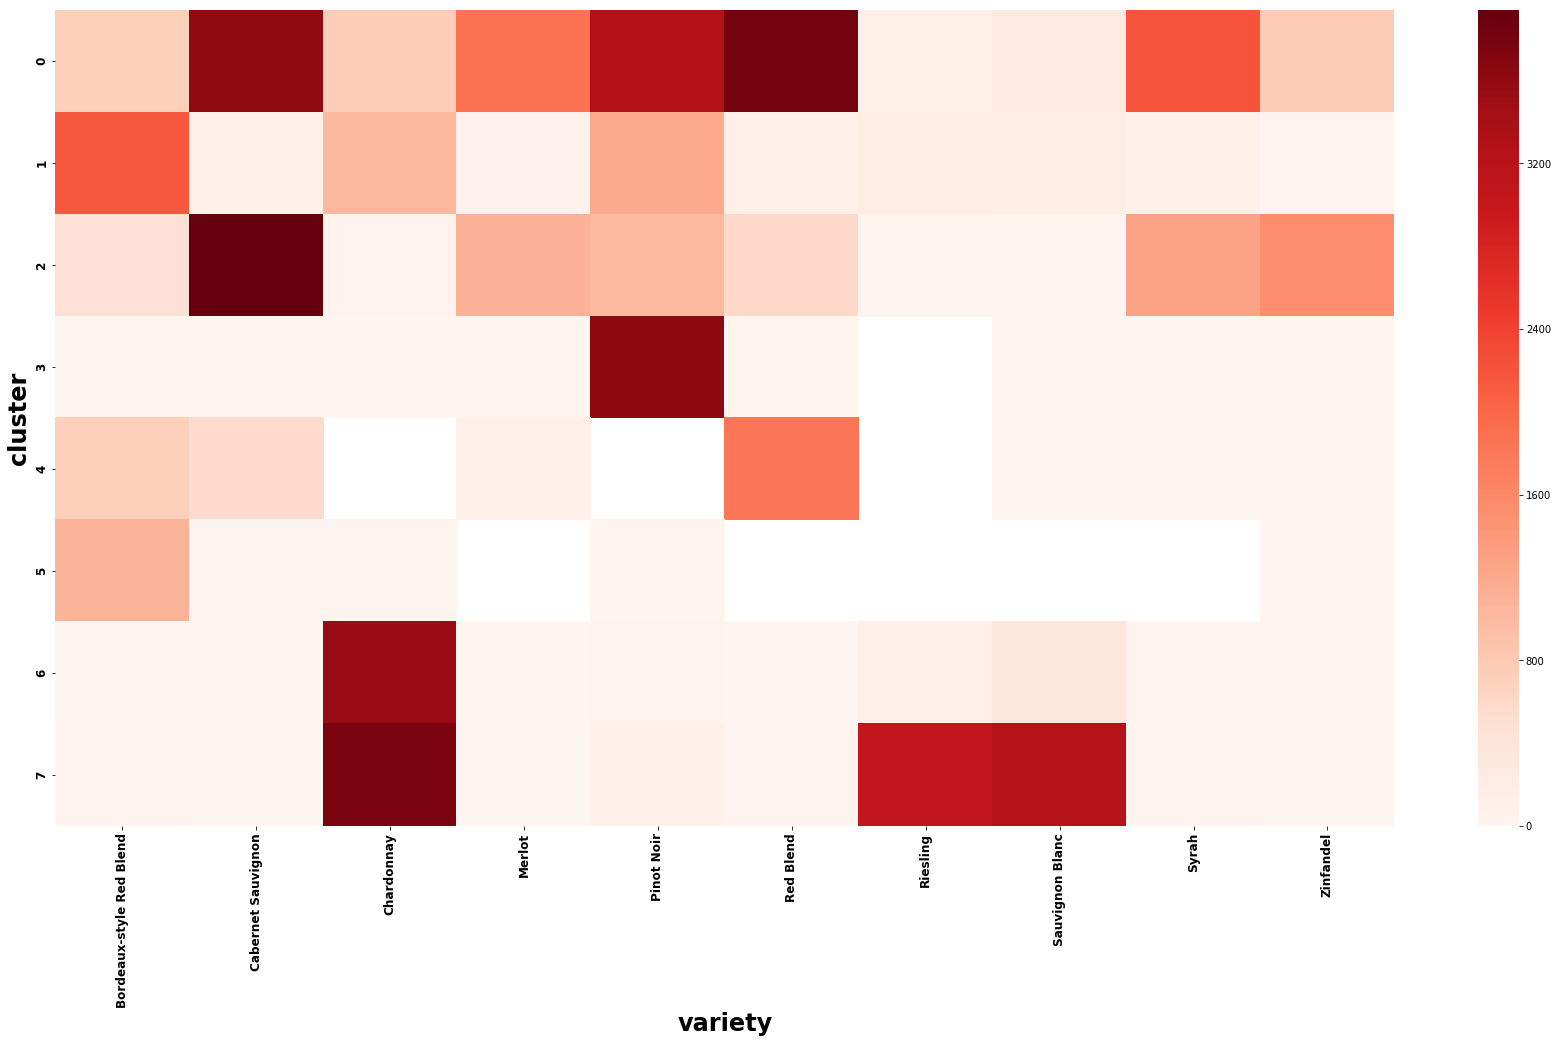

In [52]:
clusters = variety_df.groupby(['cluster', 'variety']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'variety'), ax = ax2, cmap = 'Reds')
plt.xticks(rotation = 90)

ax2.set_xlabel('variety', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(12)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(12)
    label.set_weight("bold")

In [53]:
metrics.davies_bouldin_score(X.toarray(), variety_df["cluster"])

/usr/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


7.7058914912225145

In [54]:
r_sil_samp = metrics.silhouette_samples(X.toarray(), variety_df["cluster"], metric='euclidean')

In [55]:
r_sil_score = metrics.silhouette_score(X.toarray(), variety_df["cluster"], metric='euclidean')

In [56]:
r_cal_har = metrics.calinski_harabaz_score(X.toarray(), variety_df["cluster"])

In [100]:
r_sil_score

0.009482751089555834

### 7 clusters

In [57]:
%%time
em7 = GaussianMixture(n_components = 7, max_iter=300, n_init=5, covariance_type = 'spherical')
em7.fit(X.toarray())

CPU times: user 2min 10s, sys: 37.9 s, total: 2min 48s
Wall time: 1min 25s


In [58]:
clusters = em7.predict(X.toarray())

In [59]:
proba = em7.predict_proba(X.toarray())

In [60]:
common_words = em7.means_.argsort()

In [61]:
for num, centroid in enumerate(common_words[:,-1:-11:-1]):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : pineappl, butter, oak, vanilla, toast, peach, sweet, acid, pear, rich
1 : cabernet, sauvignon, blend, franc, petit, verdot, black, cherri, fruit, tannin
2 : appl, citrus, finish, acid, crisp, lemon, miner, lime, fresh, green
3 : fruit, tannin, wood, age, structur, ripe, acid, rich, sampl, firm
4 : blackberri, cherri, dri, tannin, currant, sweet, soft, drink, rich, oak
5 : fruit, aroma, finish, cherri, berri, palat, black, red, note, plum
6 : pinot, noir, cherri, cola, silki, raspberri, dri, acid, drink, spice


In [62]:
variety_df["cluster"] = clusters

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
variety_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,cluster
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,5
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,0
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,5
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,5
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,5
11,11,US,"From 18-year-old vines, this supple well-balan...",Estate Vineyard Wadensvil Block,95,48.0,Oregon,Ribbon Ridge,Willamette Valley,Pinot Noir,Patricia Green Cellars,5
12,12,US,A standout even in this terrific lineup of 201...,Weber Vineyard,95,48.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Patricia Green Cellars,5
14,14,US,"With its sophisticated mix of mineral, acid an...",Grace Vineyard,95,185.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Domaine Serene,5
15,15,US,"First made in 2006, this succulent luscious Ch...",Sigrid,95,90.0,Oregon,Willamette Valley,Willamette Valley,Chardonnay,Bergström,5
16,16,US,"This blockbuster, powerhouse of a wine suggest...",Rainin Vineyard,95,325.0,California,Diamond Mountain District,Napa,Cabernet Sauvignon,Hall,5


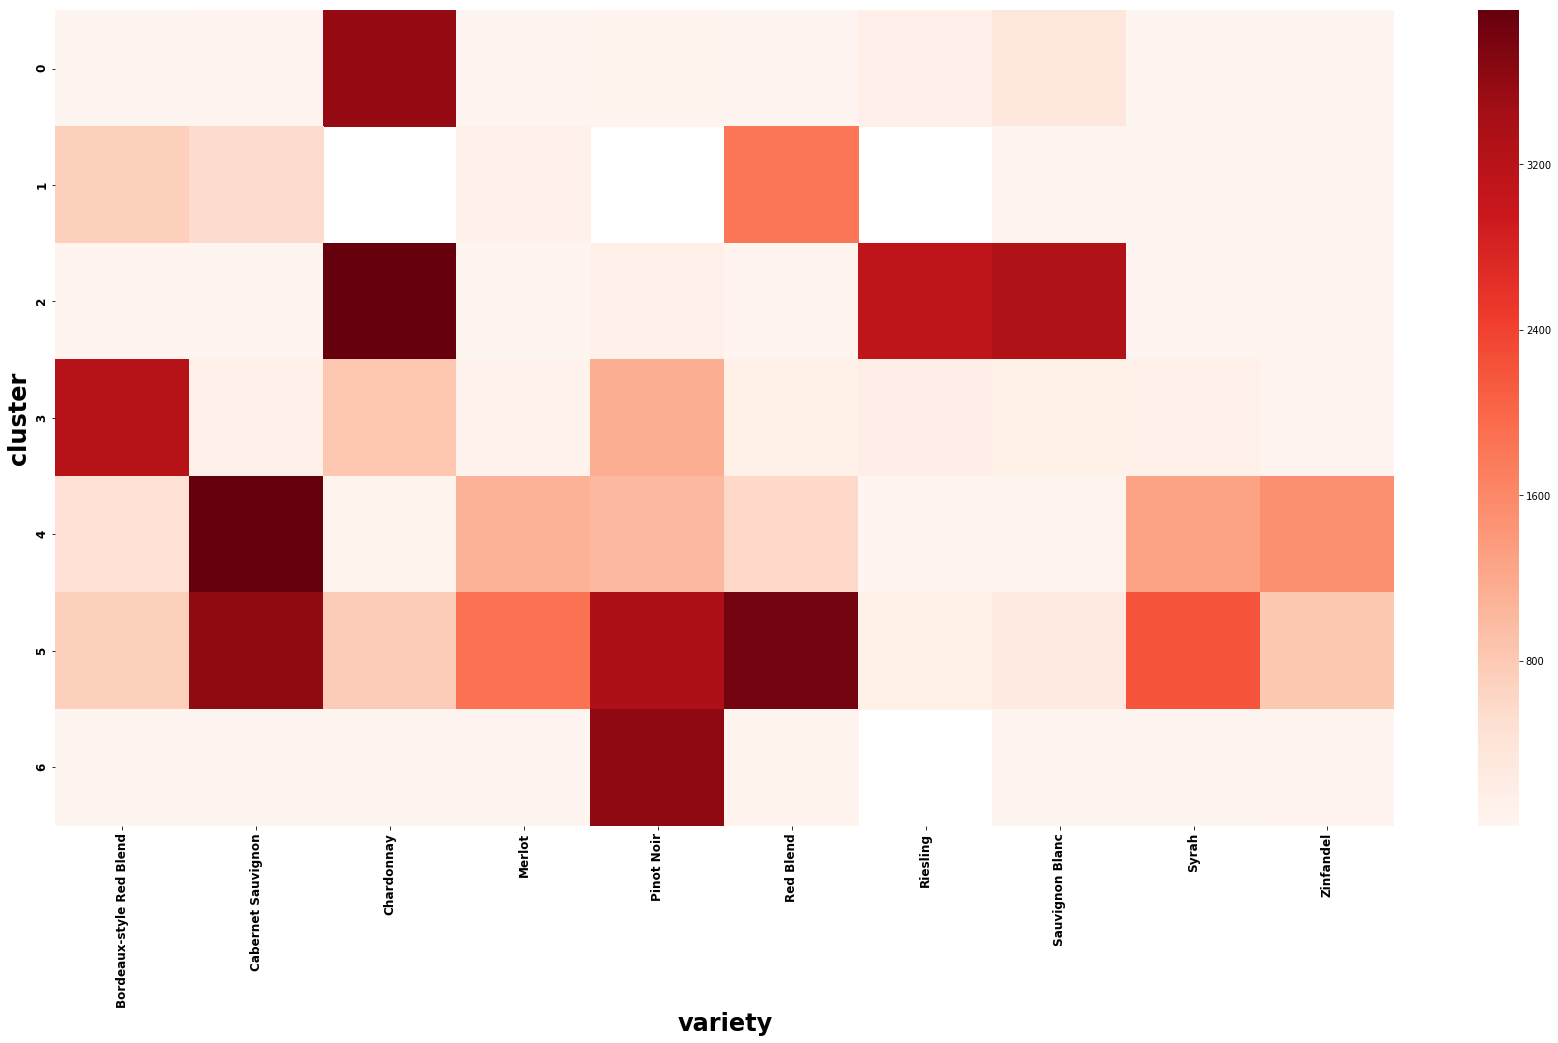

In [64]:
clusters = variety_df.groupby(['cluster', 'variety']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'variety'), ax = ax2, cmap = 'Reds')
plt.xticks(rotation = 90)

ax2.set_xlabel('variety', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(12)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(12)
    label.set_weight("bold")

In [65]:
metrics.davies_bouldin_score(X.toarray(), variety_df["cluster"])

/usr/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


8.219807968421433

In [66]:
r_sil_samp = metrics.silhouette_samples(X.toarray(), variety_df["cluster"], metric='euclidean')

In [67]:
r_sil_score = metrics.silhouette_score(X.toarray(), variety_df["cluster"], metric='euclidean')

In [68]:
r_cal_har = metrics.calinski_harabaz_score(X.toarray(), variety_df["cluster"])

### 6 clusters

In [69]:
%%time
em = GaussianMixture(n_components = 6, max_iter=300, n_init=5, covariance_type = 'spherical')
em.fit(X.toarray())

CPU times: user 2min 24s, sys: 52.9 s, total: 3min 17s
Wall time: 1min 30s


In [70]:
clusters = em.predict(X.toarray())

In [71]:
proba = em.predict_proba(X.toarray())

In [72]:
common_words = em.means_.argsort()

In [73]:
for num, centroid in enumerate(common_words[:,-1:-11:-1]):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : fruit, aroma, finish, cherri, berri, palat, black, red, plum, note
1 : blackberri, cherri, dri, tannin, currant, sweet, soft, drink, rich, oak
2 : fruit, tannin, wood, age, structur, ripe, acid, rich, sampl, firm
3 : appl, acid, citrus, finish, peach, fruit, crisp, pineappl, miner, lemon
4 : pinot, noir, cherri, cola, silki, raspberri, acid, dri, drink, spice
5 : cabernet, sauvignon, blend, franc, petit, verdot, black, cherri, fruit, tannin


In [74]:
variety_df["cluster"] = clusters

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
variety_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,cluster
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,0
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,3
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,0
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,0
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,0
11,11,US,"From 18-year-old vines, this supple well-balan...",Estate Vineyard Wadensvil Block,95,48.0,Oregon,Ribbon Ridge,Willamette Valley,Pinot Noir,Patricia Green Cellars,0
12,12,US,A standout even in this terrific lineup of 201...,Weber Vineyard,95,48.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Patricia Green Cellars,0
14,14,US,"With its sophisticated mix of mineral, acid an...",Grace Vineyard,95,185.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Domaine Serene,0
15,15,US,"First made in 2006, this succulent luscious Ch...",Sigrid,95,90.0,Oregon,Willamette Valley,Willamette Valley,Chardonnay,Bergström,3
16,16,US,"This blockbuster, powerhouse of a wine suggest...",Rainin Vineyard,95,325.0,California,Diamond Mountain District,Napa,Cabernet Sauvignon,Hall,0


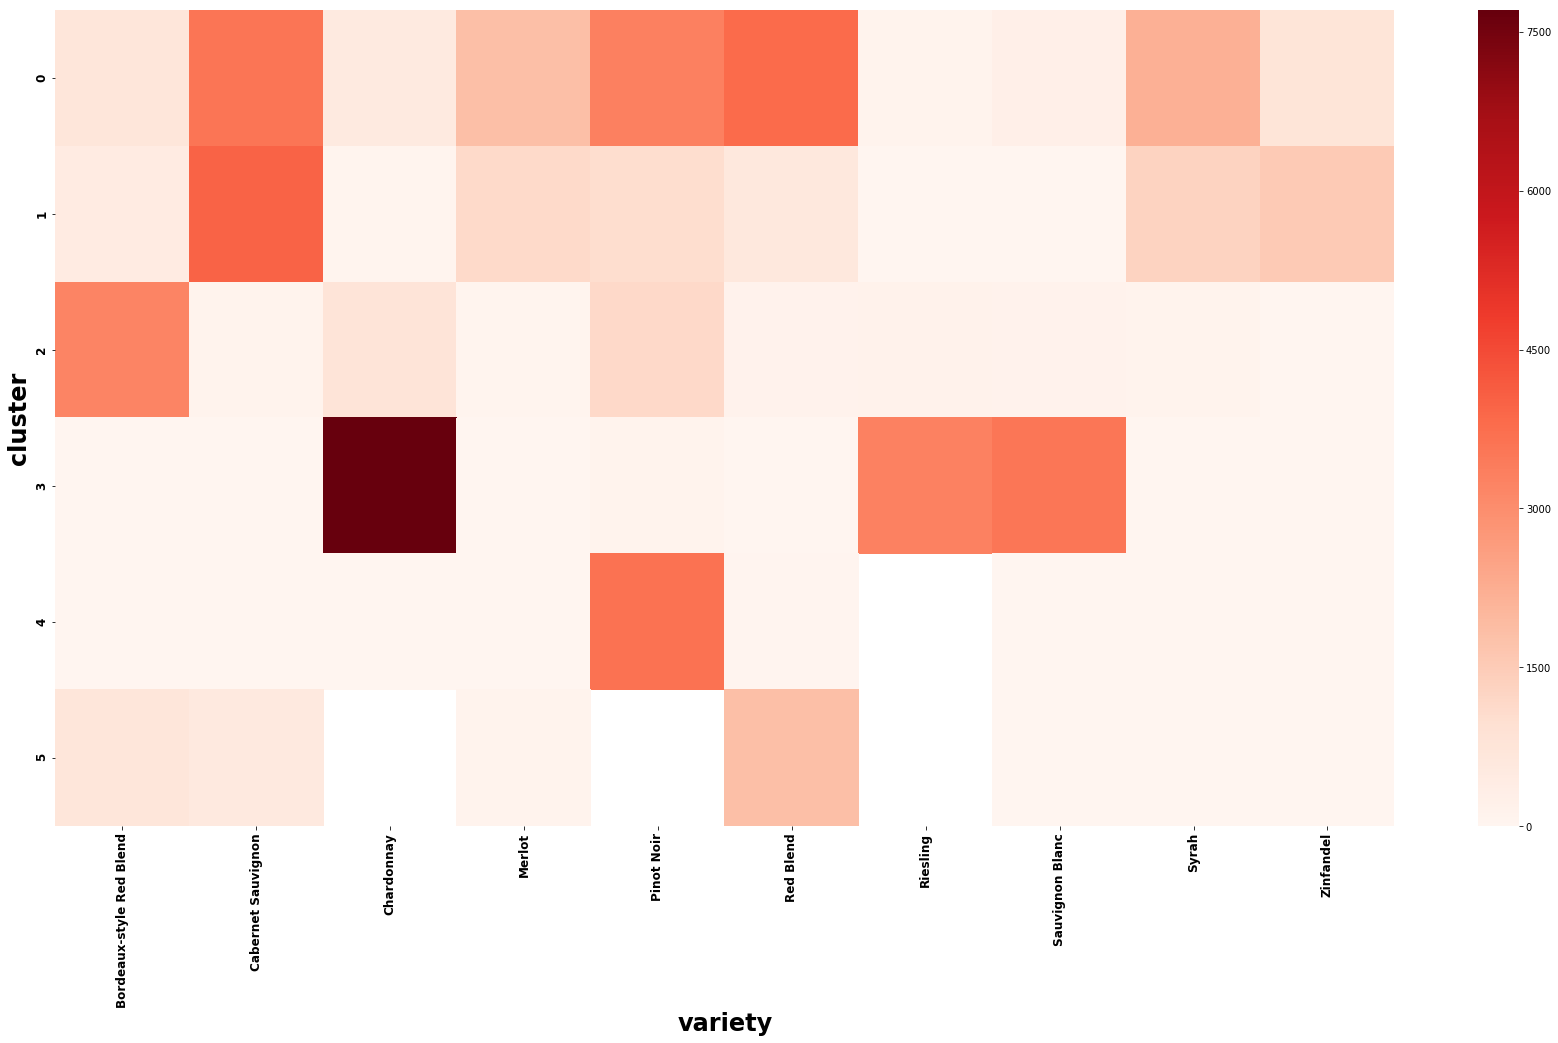

In [76]:
clusters = variety_df.groupby(['cluster', 'variety']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'variety'), ax = ax2, cmap = 'Reds')
plt.xticks(rotation = 90)

ax2.set_xlabel('variety', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(12)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(12)
    label.set_weight("bold")

In [77]:
metrics.davies_bouldin_score(X.toarray(), variety_df["cluster"])

/usr/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


8.307529927505724

In [78]:
r_sil_samp = metrics.silhouette_samples(X.toarray(), variety_df["cluster"], metric='euclidean')

In [79]:
r_sil_score = metrics.silhouette_score(X.toarray(), variety_df["cluster"], metric='euclidean')

## Kmeans

In [112]:
%%time
kmeans = KMeans(n_clusters = 7, n_init = 5, n_jobs = -1)
kmeans.fit(X)

CPU times: user 3min 30s, sys: 132 ms, total: 3min 30s
Wall time: 3min 30s


In [113]:
kmeans.labels_

array([2, 6, 2, ..., 2, 6, 6], dtype=int32)

In [114]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : pinot, noir, cherri, cola, silki, raspberri, acid, dri, drink, spice
1 : blackberri, cherri, dri, tannin, currant, sweet, soft, drink, oak, rich
2 : fruit, aroma, finish, cherri, berri, palat, black, red, plum, note
3 : sampl, barrel, tannin, fruit, ripe, wood, structur, juici, veri, firm
4 : fruit, age, tannin, wood, structur, acid, ripe, rich, year, firm
5 : cabernet, sauvignon, blend, franc, petit, verdot, black, cherri, fruit, tannin
6 : appl, acid, finish, citrus, peach, pineappl, crisp, fruit, lemon, lime


In [115]:
variety_df['clusterKM'] = kmeans.labels_

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


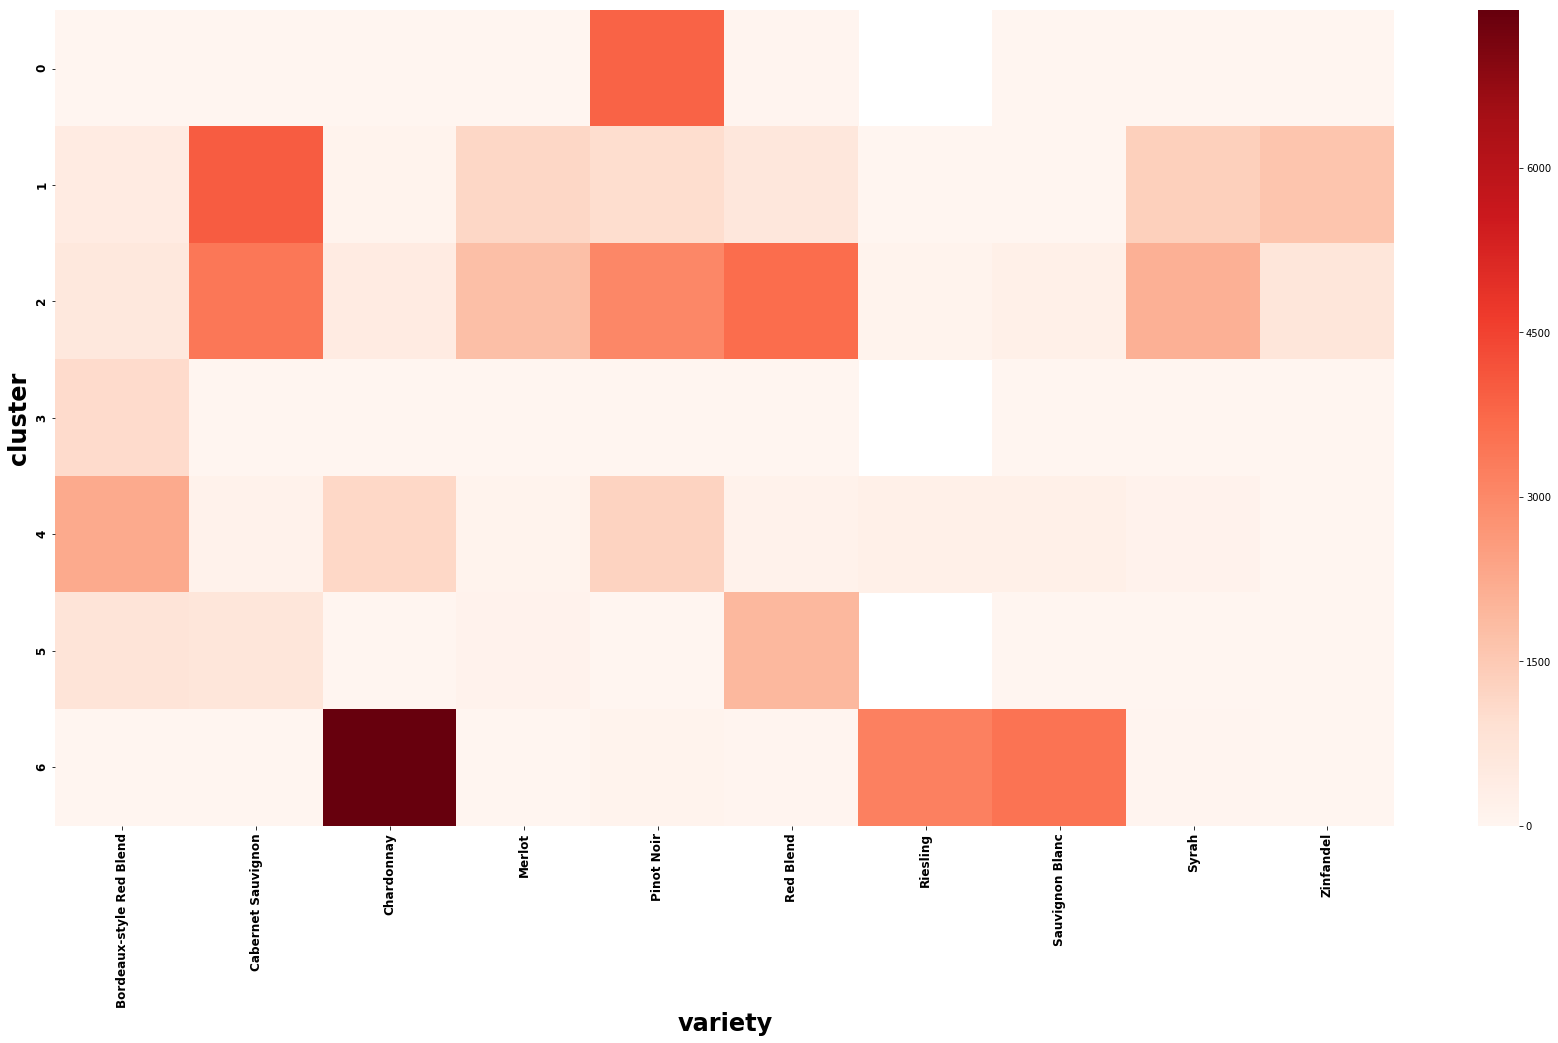

In [118]:
clusters = variety_df.groupby(['clusterKM', 'variety']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'variety'), ax = ax2, cmap = 'Reds')
plt.xticks(rotation = 90)

ax2.set_xlabel('variety', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(12)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(12)
    label.set_weight("bold")

In [96]:
metrics.davies_bouldin_score(X.toarray(), variety_df["cluster"])

/usr/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


7.609630177255366

In [97]:
r_sil_samp = metrics.silhouette_samples(X.toarray(), variety_df["cluster"], metric='euclidean')

In [98]:
r_sil_score = metrics.silhouette_score(X.toarray(), variety_df["cluster"], metric='euclidean')

In [99]:
r_cal_har = metrics.calinski_harabaz_score(X.toarray(), variety_df["cluster"])

In [102]:
r_cal_har

290.5646402328695

In [107]:
com = metrics.cluster.contingency_matrix(variety_df["clusterEM"], variety_df["clusterKM"])

In [108]:
com

array([[  405,   382,   200, 15177,     8,   132,   959,   181],
       [    9,    55,     2,     1,     1,     1,    16,  5148],
       [   10,  7280,    34,   157,     3,    83,  2417,    28],
       [    0,     5,     1,     0,     0,  3687,    62,     1],
       [    0,    39,  3187,     0,     0,     0,     9,     0],
       [    0,     0,     0,     0,  1079,     0,     0,     0],
       [ 3230,    26,     1,    52,     2,    11,   749,    41],
       [ 9849,     4,     6,    78,     0,     6,   253,   159]])

In [109]:
hom = metrics.cluster.homogeneity_completeness_v_measure(variety_df["clusterEM"], variety_df["clusterKM"])

In [110]:
hom

(0.7729577224957831, 0.7648068618037142, 0.768860690491504)